## Problem Statement

We are trying to predict if user will enroll for the paid version of a financial tracking application after using the free version for a free trial period of 24 hours based on a number of features given in the dataset so that the fintech and direct more marketing efforts to the users who are likely not to enroll for the paid version of app than those who most likely will.

In [75]:
#### Importing Libraries ####

import pandas as pd
from dateutil import parser
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

In [76]:
##Import the dataset

dataset = pd.read_csv('E:/Udemy_Machine_Learning_Practical/Directing_Customers_To_Subscription_Through_App_Behavior_Analysis/P39-CS3-Data/appdata10.csv')

In [77]:
## Exploratory Data Analysis

dataset.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [78]:
dataset.describe()

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


In [79]:
# parsing the hour field
#Note that the hour field was not included in the above result as it isn't in the right format that's why we parse it
dataset['hour'] = dataset.hour.str.slice(1, 3).astype(int)

In [80]:
dataset.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,2,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,1,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [81]:
# Plotting the dataset

#creating a temporary dataset for histograms
dataset2 = dataset.copy().drop(columns = ['user', 'screen_list', 'enrolled_date', 'first_open', 'enrolled'])
dataset2

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked
0,3,2,23,15,0,0,0
1,6,1,24,13,0,0,0
2,1,19,23,3,0,1,1
3,4,16,28,40,0,0,0
4,1,18,31,32,0,0,1
...,...,...,...,...,...,...,...
49995,3,13,32,13,0,0,0
49996,1,0,35,4,0,1,0
49997,2,22,39,25,0,0,0
49998,6,12,27,26,0,0,0


In [82]:
dataset2.dtypes

dayofweek               int64
hour                    int32
age                     int64
numscreens              int64
minigame                int64
used_premium_feature    int64
liked                   int64
dtype: object

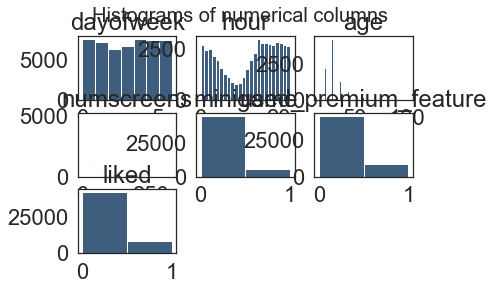

In [83]:
# Histograms

plt.suptitle('Histograms of numerical columns', fontsize = 20)
for i in range(1, dataset2.shape[1]+1):
    plt.subplot(3, 3, i)
    f = plt.gca()
    f.set_title(dataset2.columns.values[i - 1])
    
    vals = np.size(dataset2.iloc[:, i-1].unique())
    
    plt.hist(dataset2.iloc[:, i - 1], bins = vals, color = '#3F5D7D')

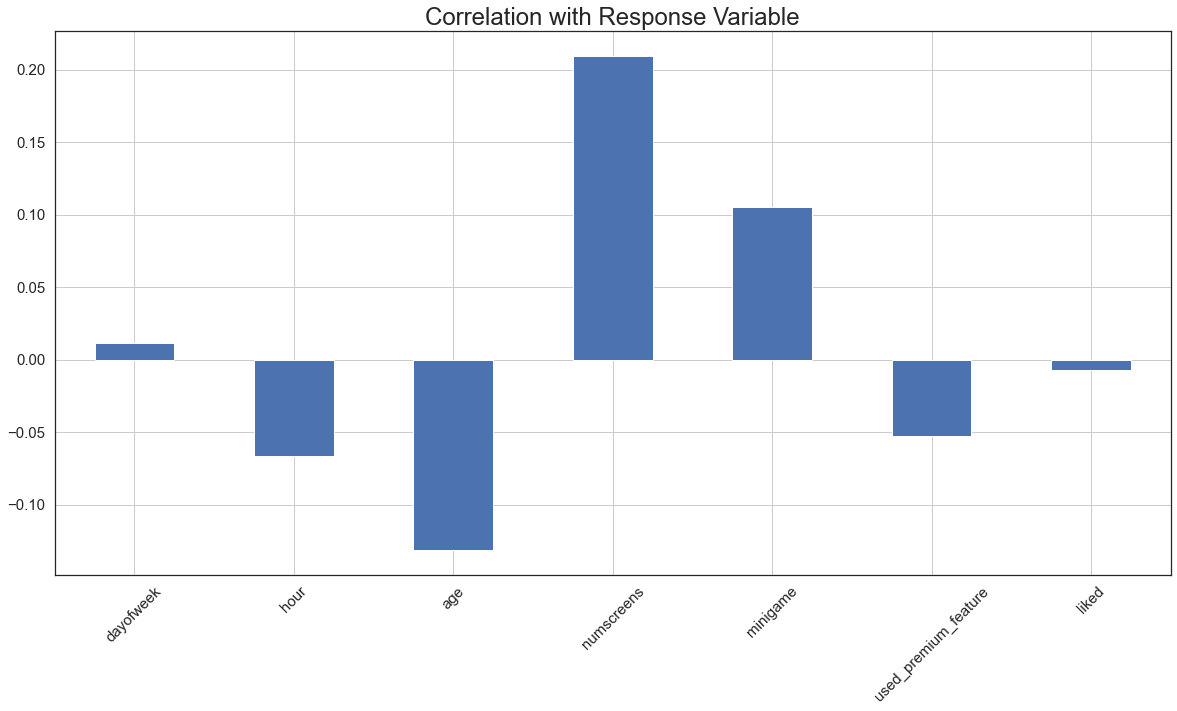

In [84]:
# Correlation Plot
dataset2.corrwith(dataset.enrolled).plot.bar(figsize = (20, 10), title = 'Correlation with Response Variable', fontsize = 15, rot = 45, grid = True)

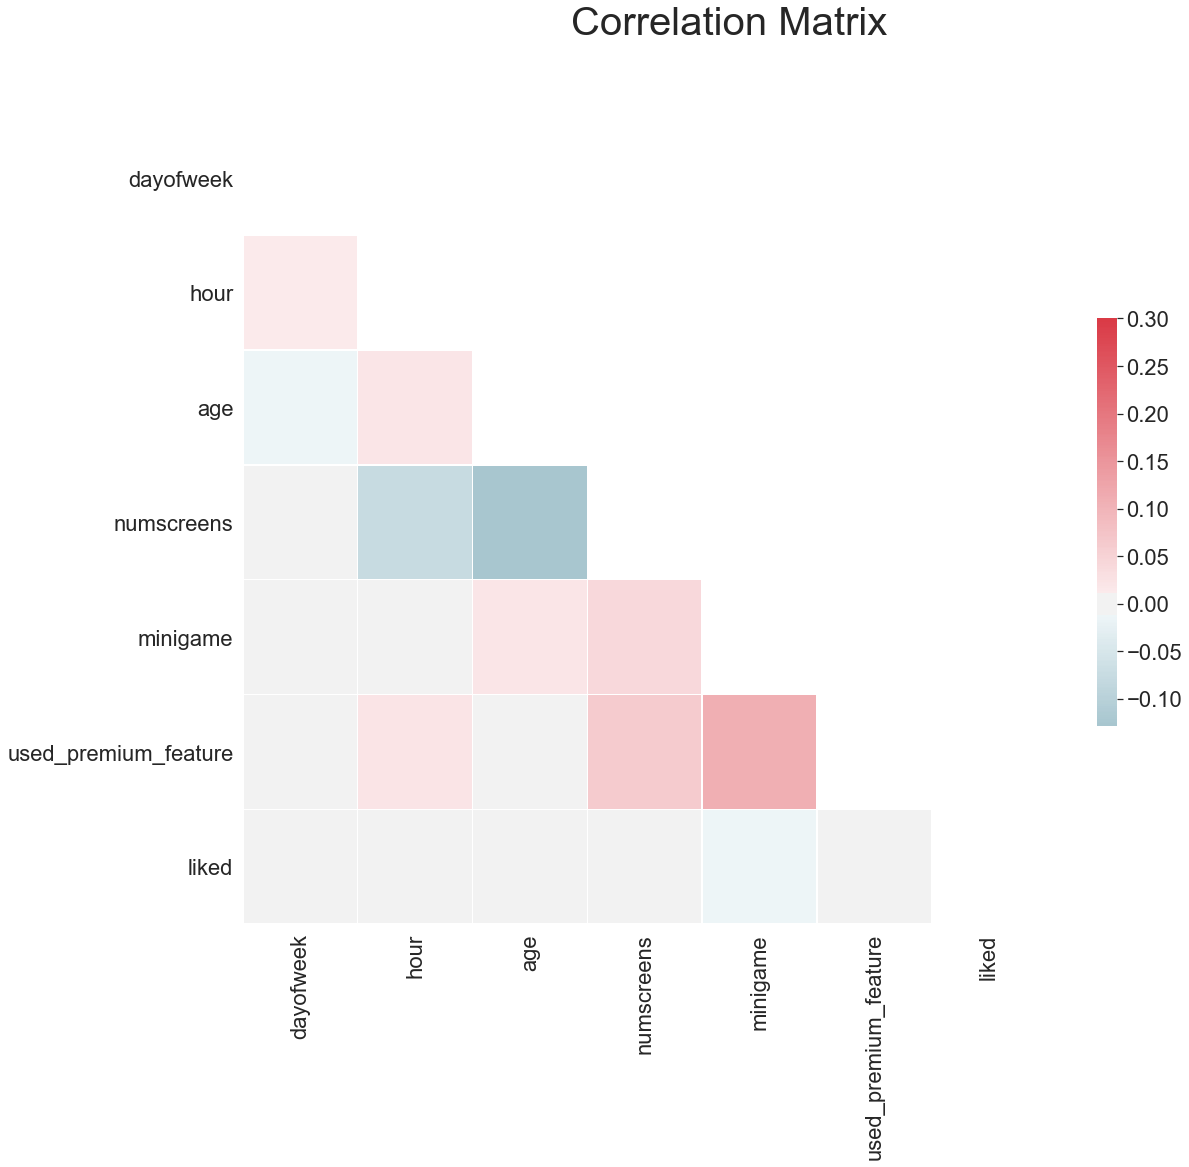

In [85]:
# Correlation Matrix

sn.set(style="white", font_scale=2)

# Compute the correlation matrix
corr = dataset2.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 15))
f.suptitle("Correlation Matrix", fontsize = 40)

# Generate a custom diverging colormap
cmap = sn.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sn.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

We see that there are no strong correlations between any of the independent variables in the dataset which means that they are independent of each other. Hence, the assumption for independent variables is satisfied.

In [86]:
# Feature Engineering - Response
# We need this to finetune the response variable. Often, we like putting a time limit on when we expect a user to convert to 
# a paid subscription since first_open as this helps us in validating the model. for eg. if we consider a time limit of one 
# week for enrollments to be considered then we only have to wait for one week to validate if the model was accurate in 
# predicting if the user will enroll or not. This can't be done for an all time enrollment as we will have to wait for 
# all time to validate the model which isn't feasible. So, it's good to have a time limit on the response variable.
# Note that there are people who subscribed after a very long time since first_open which might happen beacuse of some 
# reason other than the 24 hour trial and such users can't be considered for building the model.
dataset.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                     int32
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

In [87]:
#Coverting the date fields to datetime data type
dataset["first_open"] = [parser.parse(row_data) for row_data in dataset["first_open"]]
dataset["enrolled_date"] = [parser.parse(row_data) if isinstance(row_data, str) else row_data for row_data in dataset["enrolled_date"]]

In [88]:
dataset.dtypes

user                             int64
first_open              datetime64[ns]
dayofweek                        int64
hour                             int32
age                              int64
screen_list                     object
numscreens                       int64
minigame                         int64
used_premium_feature             int64
enrolled                         int64
enrolled_date           datetime64[ns]
liked                            int64
dtype: object

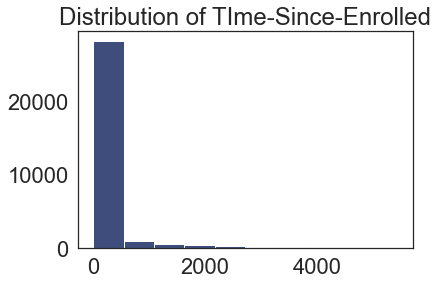

In [89]:
#Calculating the difference between the first_open and enrolled_date

dataset["difference"] = (dataset.enrolled_date - dataset.first_open).astype('timedelta64[h]')

plt.hist(dataset["difference"].dropna(), color = '#3F4D7D')
plt.title('Distribution of TIme-Since-Enrolled')
plt.show()

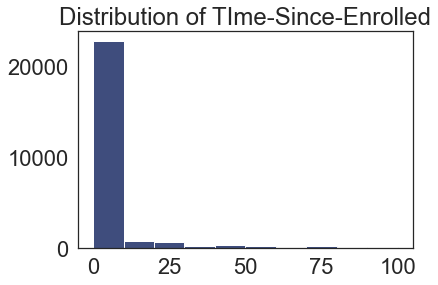

In [90]:
# SInce we see a tail in the above figure, this time we try putting a range 
dataset["difference"] = (dataset.enrolled_date - dataset.first_open).astype('timedelta64[h]')

plt.hist(dataset["difference"].dropna(), color = '#3F4D7D', range = [0, 100])
plt.title('Distribution of TIme-Since-Enrolled')
plt.show()

The above plot shows a high value for first 10 hours but since histogram shows comparative heights of bars and we know there is a lot happening after 100 hours as well from the previous graph, let's consider that most customers who enroll for sunscription, do so in forst 48 hours.

In [91]:
# Setting enrolled value zero for customers who enrolled after 48 hours of first_open
dataset.loc[dataset.difference > 48, 'enrolled'] = 0

In [92]:
# Dropping the columns no longer needed
dataset = dataset.drop(columns = ['difference', 'enrolled_date', 'first_open'])

In [93]:
# Feature Engineering - Screens
# Since we have list of screens visited by the users in the screen_list column which is not understood by the model, 
# we need to convert it into a format that can be used to build the model. One solution can be one-hot encoding but doing so
# will blow up the number of features ti be considered to build the model. This is why we have another dataset that tells us
# top screens used by the users in the first 24hours of installing/first_open which is nothing but the trial period. 

top_screens =  pd.read_csv('E:/Udemy_Machine_Learning_Practical/Directing_Customers_To_Subscription_Through_App_Behavior_Analysis/P39-CS3-Data/top_screens.csv').top_screens.values


In [94]:
top_screens

array(['Loan2', 'location', 'Institutions', 'Credit3Container',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth',
       'ProfilePage', 'VerifyCountry', 'Cycle', 'idscreen',
       'Credit3Dashboard', 'Loan3', 'CC1Category', 'Splash', 'Loan',
       'CC1', 'RewardsContainer', 'Credit3', 'Credit1', 'EditProfile',
       'Credit2', 'Finances', 'CC3', 'Saving9', 'Saving1', 'Alerts',
       'Saving8', 'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'Saving7', 'ProfileEducationMajor', 'Rewards', 'AccountView',
       'VerifyAnnualIncome', 'VerifyIncomeType', 'Saving2', 'Saving6',
       'Saving2Amount', 'Saving5', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'Loan4',
       'ResendToken', 'TransactionList', 'NetworkFailure', 'ListPicker'],
      dtype=object)

In [95]:
# We map the values in the top_screen with those in screen_list and create new column for each screen in the top_screen list
# with value 1 if the user visited the screen and 0 otherwise and delete the screen name from screen_list after the column 
# has been created.

dataset['screen_list'] = dataset.screen_list.astype(str) + ','

for sc in top_screens:
    dataset[sc] = dataset.screen_list.str.contains(sc).astype(int)
    dataset["screen_list"] = dataset.screen_list.str.replace(sc+",", "")

In [96]:
# the number of extra screens left in the screen_list column after all the values in top_screen have been mapped is
# recorded in Other column and screen_list column dropped from dataset.

dataset["Other"] = dataset.screen_list.str.count(",")
dataset = dataset.drop(columns = ["screen_list"])

In [97]:
# Funnels - These are a group of screens that belong to the same set. There are many screens that are correlated to each
# other which is not good for the moddel as we dont want correlated features.So, in order to get rid of the correlation and
# still keep the value from all those screens, we group all the correlated screens into a funnel.

savings_screens = ["Saving1",
                    "Saving2",
                    "Saving2Amount",
                    "Saving4",
                    "Saving5",
                    "Saving6",
                    "Saving7",
                    "Saving8",
                    "Saving9",
                    "Saving10"]
dataset["SavingsCount"] = dataset[savings_screens].sum(axis = 1)
dataset.drop(columns = savings_screens)

cm_screens = ["Credit1",
               "Credit2",
               "Credit3",
               "Credit3Container",
               "Credit3Dashboard"]
dataset["CMCount"] = dataset[cm_screens].sum(axis=1)
dataset = dataset.drop(columns=cm_screens)

cc_screens = ["CC1",
                "CC1Category",
                "CC3"]
dataset["CCCount"] = dataset[cc_screens].sum(axis=1)
dataset = dataset.drop(columns=cc_screens)

loan_screens = ["Loan",
               "Loan2",
               "Loan3",
               "Loan4"]
dataset["LoansCount"] = dataset[loan_screens].sum(axis=1)
dataset = dataset.drop(columns=loan_screens)


In [98]:
dataset.head()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Other,SavingsCount,CMCount,CCCount,LoansCount
0,235136,3,2,23,15,0,0,0,0,0,...,0,0,0,0,0,7,0,0,0,1
1,333588,6,1,24,13,0,0,0,0,1,...,0,0,0,0,0,5,0,0,0,1
2,254414,1,19,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,234192,4,16,28,40,0,0,1,0,1,...,0,0,0,0,0,6,0,3,0,1
4,51549,1,18,31,32,0,0,1,1,0,...,0,0,0,0,0,10,0,2,0,1


In [99]:
dataset.describe()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,Other,SavingsCount,CMCount,CCCount,LoansCount
count,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000
mean,186889.729900,3.029860,12.557220,31.72436,21.095900,0.107820,0.172020,0.497000,0.165000,0.517760,...,0.014220,0.013340,0.013400,0.008200,0.007580,6.214260,0.365020,0.92776,0.176860,0.788400
std,107768.520361,2.031997,7.438072,10.80331,15.728812,0.310156,0.377402,0.499996,0.371184,0.499689,...,0.118398,0.114727,0.114981,0.090183,0.086733,3.672561,1.405511,1.21751,0.612787,0.677462
min,13.000000,0.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,93526.750000,1.000000,5.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.00000,0.000000,0.000000
50%,187193.500000,3.000000,14.000000,29.00000,18.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.00000,0.000000,1.000000
75%,279984.250000,5.000000,19.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,1.00000,0.000000,1.000000
max,373662.000000,6.000000,23.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,10.000000,5.00000,3.000000,3.000000


In [100]:
dataset.columns

Index(['user', 'dayofweek', 'hour', 'age', 'numscreens', 'minigame',
       'used_premium_feature', 'enrolled', 'liked', 'location', 'Institutions',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth', 'ProfilePage',
       'VerifyCountry', 'Cycle', 'idscreen', 'Splash', 'RewardsContainer',
       'EditProfile', 'Finances', 'Saving9', 'Saving1', 'Alerts', 'Saving8',
       'Saving10', 'Leaderboard', 'Saving4', 'VerifyMobile', 'VerifyHousing',
       'RewardDetail', 'VerifyHousingAmount', 'ProfileMaritalStatus',
       'ProfileChildren ', 'ProfileEducation', 'Saving7',
       'ProfileEducationMajor', 'Rewards', 'AccountView', 'VerifyAnnualIncome',
       'VerifyIncomeType', 'Saving2', 'Saving6', 'Saving2Amount', 'Saving5',
       'ProfileJobTitle', 'Login', 'ProfileEmploymentLength', 'WebView',
       'SecurityModal', 'ResendToken', 'TransactionList', 'NetworkFailure',
       'ListPicker', 'Other', 'SavingsCount', 'CMCount', 'CCCount',
       'LoansCount'],
      dtype='object

In [101]:
dataset.to_csv('E:/Udemy_Machine_Learning_Practical/Directing_Customers_To_Subscription_Through_App_Behavior_Analysis/P39-CS3-Data/new_appdata10_s.csv', index = False)